# Logistic Regression Project Exercise 

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch dataset
heart_disease = fetch_ucirepo(id=45) 

# Data (as pandas dataframes)
X = heart_disease.data.features 
y = heart_disease.data.targets 

# Combine features and target into one dataframe for EDA
df = pd.concat([X, y], axis=1)
print(df.isna().sum())
df.dropna(inplace=True)
print(df)




age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
297   57    0   4       140   241    0        0      123      1      0.2   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   1

### Exploratory Data Analysis and Visualization
---
- Perform EDA and explain each graph

### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

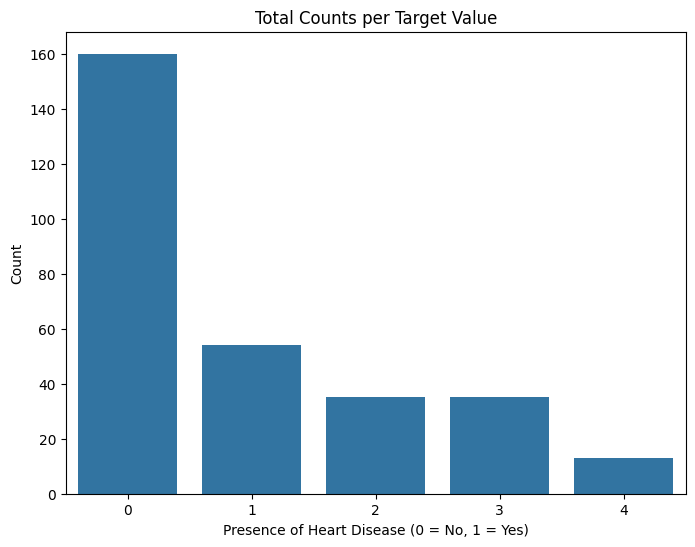

In [2]:
# Bar plot of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=df)
plt.title('Total Counts per Target Value')
plt.xlabel('Presence of Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**TASK: Create a pairplot that displays the relationships between the following columns:**

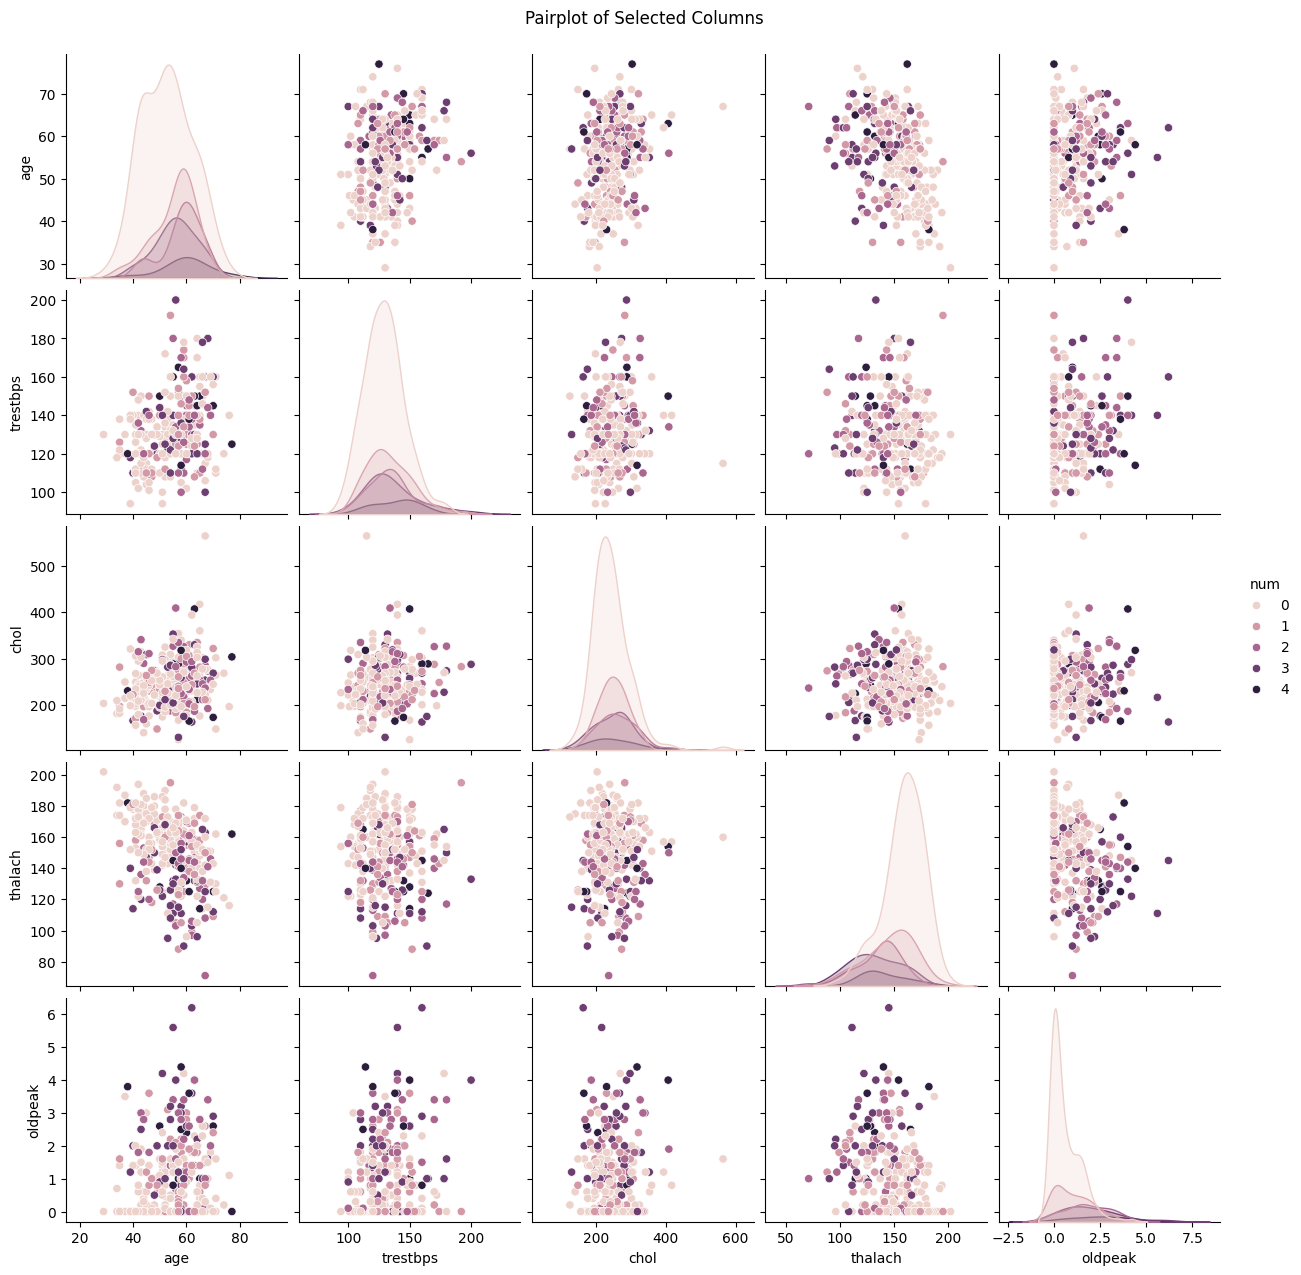

In [3]:
# Pairplot of selected columns
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num']
sns.pairplot(df[selected_columns], hue = 'num', diag_kind='auto')
plt.suptitle('Pairplot of Selected Columns', y=1.02)
plt.show()


**TASK: Create a heatmap that displays the correlation between all the columns.**

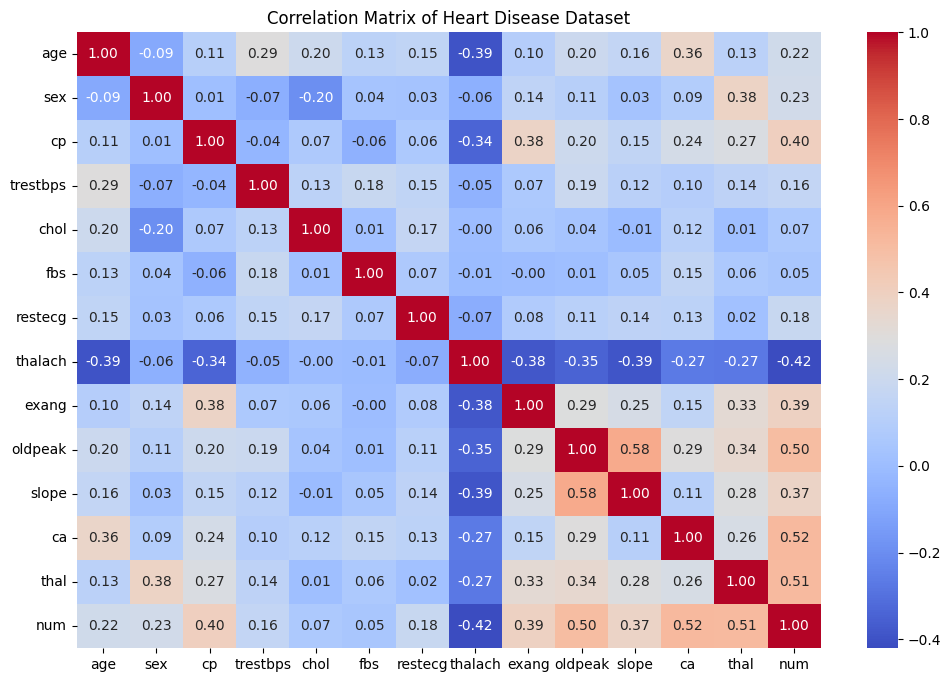

In [4]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Heart Disease Dataset')
plt.show()


# Modeling Task

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [14]:
# Separate features and target
X = df.drop('num', axis=1)
y = df['num']


**TASK: Perform a train test split on the data, with the test size of 5% and a random_state of 0.**

In [15]:
from sklearn.model_selection import train_test_split
y_binary = (y > 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.05, random_state=0)



**TASK: Create a StandardScaler object and normalize the X train and test set feature data.**

In [16]:
from sklearn.preprocessing import StandardScaler# Train-test split
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [17]:
from sklearn.linear_model import LogisticRegressionCV
log_reg_cv = LogisticRegressionCV(cv=5, max_iter=1000)
log_reg_cv.fit(X_train_scaled, y_train)

LogisticRegressionCV(cv=5, max_iter=1000)

### Coeffecients

**TASK: Report back the model's coefficients.**

In [18]:
# Best C value found
best_C = log_reg_cv.C_[0]
print(f'Optimal C value: {best_C}')

# Predict on the test set
y_pred = log_reg_cv.predict(X_test_scaled)

from sklearn.metrics import classification_report
# Classification report
print(classification_report(y_test, y_pred))

# Get the model's coefficients
coefficients = log_reg_cv.coef_[0]
features = X.columns

# Create a dataframe for visualization
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Report the coefficients
print(coeff_df)

Optimal C value: 0.005994842503189409
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.80      0.57      0.67         7

    accuracy                           0.73        15
   macro avg       0.75      0.72      0.72        15
weighted avg       0.75      0.73      0.73        15

     Feature  Coefficient
0        age     0.071571
1        sex     0.123596
2         cp     0.186066
3   trestbps     0.076539
4       chol     0.036653
5        fbs    -0.022662
6    restecg     0.066591
7    thalach    -0.163232
8      exang     0.166619
9    oldpeak     0.151812
10     slope     0.110318
11        ca     0.199922
12      thal     0.221870


**Task: Create a visualization of the coefficients.**

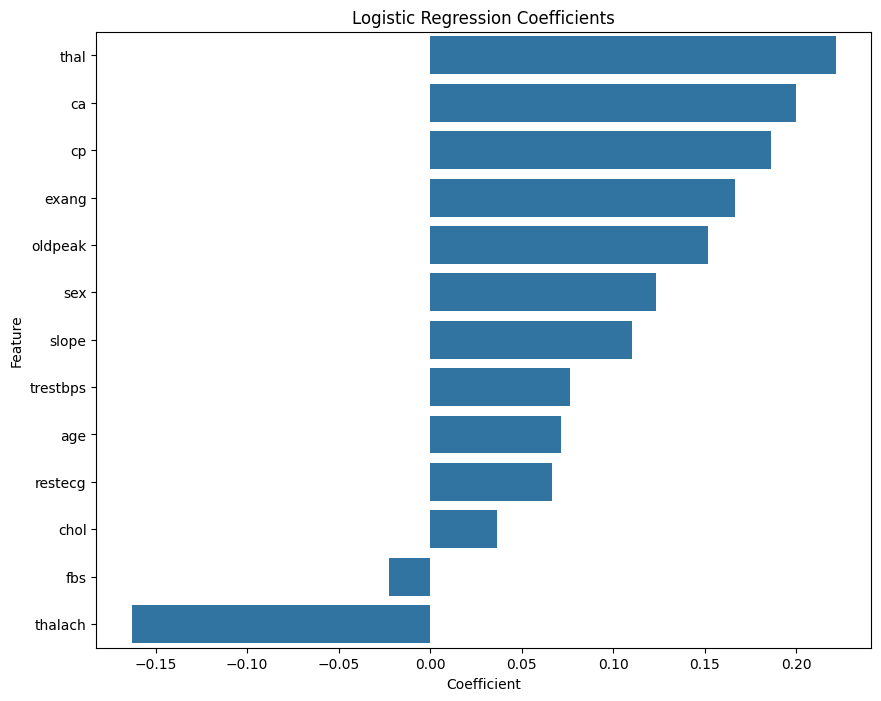

In [20]:
# Plotting the coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df.sort_values(by='Coefficient', ascending=False))
plt.title('Logistic Regression Coefficients')
plt.show()

---------

## Model Performance Evaluation

**TASK: Evaluate your model on the remaining 5% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

Confusion Matrix:
[[7 1]
 [3 4]]


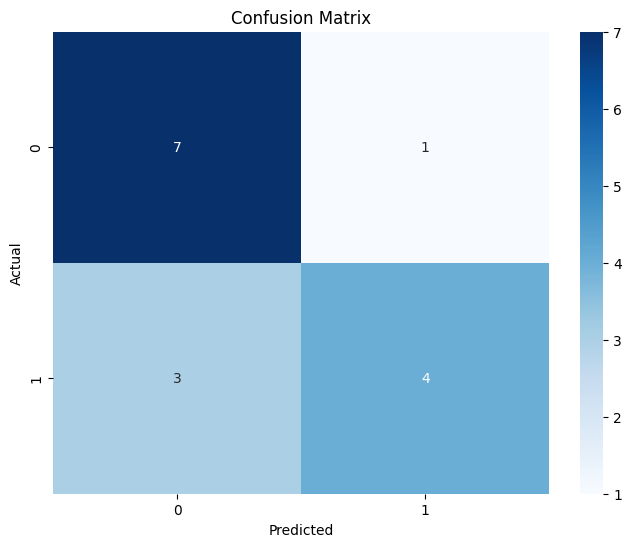

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.80      0.57      0.67         7

    accuracy                           0.73        15
   macro avg       0.75      0.72      0.72        15
weighted avg       0.75      0.73      0.73        15



In [21]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = log_reg_cv.predict(X_test_scaled)
y_proba = log_reg_cv.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix Array
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

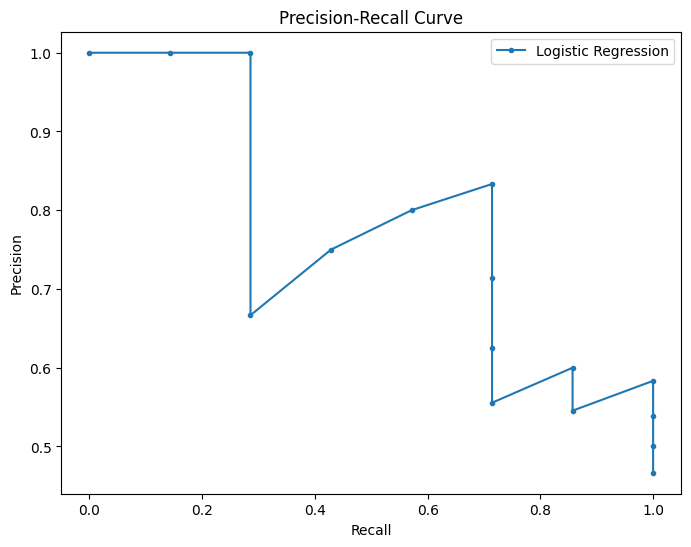

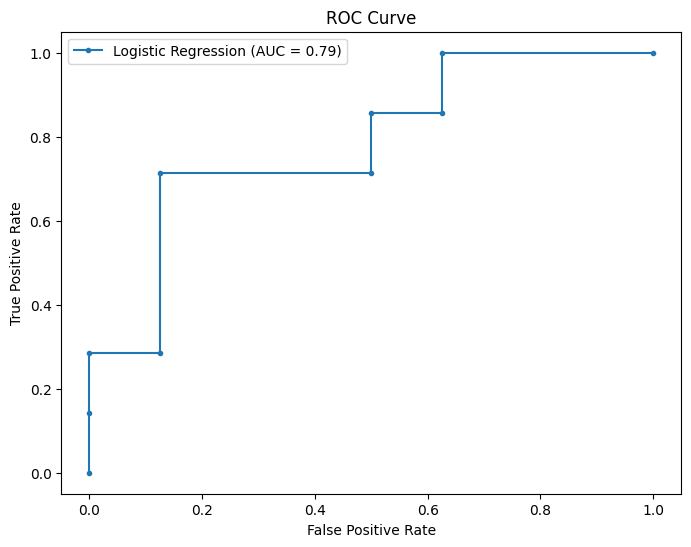

In [22]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()